In [197]:
import re
import nltk
import random
nltk.download('stopwords')
import numpy as np
from collections import OrderedDict
from nltk.stem.porter import *
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /home/mayank/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [198]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))
f = open("Assignment_2_data.txt")
with_stopwords = []
total_output = []
token_counts = OrderedDict()
token_countsDict = dict()
ind_list = None
lines = f.readlines()
random.shuffle(lines) # shuffling for random 80% train data and 20% test data
total_input = []
lamda = 0.1 #learning rate
epoch = 5
x_axis = []
y_axis =[]

In [199]:
for line in lines:
    line = line.strip()
    if(line[0:3]=='ham'):
        line = line[3:]
        total_output.append(-1.0)
        total_input.append(tokens)
    elif(line[0:4]=='spam'):
        line = line[4:]
        total_output.append(1.0)
        total_input.append(tokens)
    tokens = re.findall(r"[\w']+",line)
    with_stopwords.append(tokens)
    tokens = [stemmer.stem(token) for token in tokens]
    for token in tokens:
        token_counts[token] = token_counts.get(token, 0) + 1
        token_countsDict[token] = token_countsDict.get(token, 0) + 1
no_distinct_tokens = len(token_counts)
ind_list = list(token_counts.keys())
v = no_distinct_tokens

In [200]:
def toVec(tokens):
    global token_countsDict,ind_list
    v_one = np.zeros(len(token_counts))
    for token in tokens:
        if (token_countsDict.get(token,0)!=0):
            v_one[ind_list.index(token)]=1
    return v_one

In [201]:
def vectorize(total_input):
    for i in range(len(total_input)):
        total_input[i] = toVec(total_input[i])
        total_input[i].shape = (len(total_input[i]),1)

In [202]:
w1 = (np.random.rand(100,v)-0.5)*2
b1 = (np.random.rand(100,1)-0.5)*2
w2 = (np.random.rand(50,100)-0.5)*2
b2 = (np.random.rand(50,1)-0.5)*2
w3 = (np.random.rand(1,50)-0.5)*2
b3 = (np.random.rand(1,1)-0.5)*2

In [203]:
vectorize(total_input)
train_x = total_input[:int(0.8*len(total_input))]
train_y = total_output[:int(0.8*len(total_input))]
test_x = total_input[int(0.8*len(total_input)):]
test_y = total_output[int(0.8*len(total_input)):]

In [204]:
def feedForward(x,w1,b1,w2,b2,w3,b3):

    t1 = (w1.dot(x))+b1
    x1 = np.tanh(t1)
    t2 = (w2.dot(x1))+b2
    x2 = np.tanh(t2)
    t3 = (w3.dot(x2))+b3
    x3 = np.tanh(t3)
    

  
    return t1,x1,t2,x2,t3,x3

In [205]:
def error_func(train_x,train_y,w1,b1,w2,b2,w3,b3):
    pred_spams, pred_hams, error = 0,0,0.0
    for i in range(len(train_x)):
        t1,x1,t2,x2,t3,x3 = feedForward(train_x[i],w1,b1,w2,b2,w3,b3)
        error = error + (train_y[i]- x3)**2
    return error

In [206]:
def backpropogate(y,t1,x1,t2,x2,t3,x3,w1,b1,w2,b2,w3,b3,v):
    global lamda
    dx3 = x3-y
    dt3 = dx3 * (1 - (np.tanh(t3) ** 2))
    b3 -= (lamda * dt3)
    
    dw3 = np.outer(dt3, x2)
    w3 -= (lamda * dw3)
    dx2 = np.transpose(w3).dot(dt3)

    dt2 = dx2 * (1 - (np.tanh(t2) ** 2))
    b2 -= (lamda * dt2)
    dw2 = np.outer(dt2, x1)

    w2 -= (lamda * dw2)
    dx1 = np.transpose(w2).dot(dt2)
    
    dt1 = dx1 * (1 - (np.tanh(t1) ** 2))
    b1 -= (lamda * dt1)
    dw1 = np.outer(dt1, v)
    w1 -= (lamda * dw1)

In [207]:
for _ in range(epoch):
    for i in range(len(train_x)):   
        t1,x1,t2,x2,t3,x3 = feedForward(train_x[i],w1,b1,w2,b2,w3,b3)
        backpropogate(train_y[i],t1,x1,t2,x2,t3,x3,w1,b1,w2,b2,w3,b3,train_x[i])
        if(i%100 == 0):
            print(i)
            x_axis.append(i)
            temp = error_func(train_x,train_y,w1,b1,w2,b2,w3,b3)
            y_axis.append(temp[0][0])
        

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100


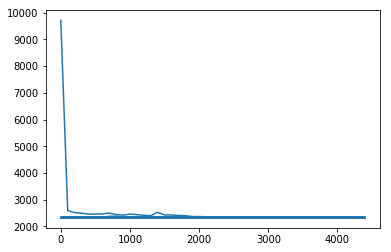

In [210]:
import matplotlib.pyplot as plt
plt.plot(x_axis,y_axis)